<a href="https://colab.research.google.com/github/SamarSaeed1146/Internet_Chatbot/blob/main/internet_chatbot_with_nodes_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture --no-stderr
%pip install -U langchain_google_genai langgraph langchain_core langchain tavily-python langchain_community

In [3]:
import time
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

os.environ['LANGCHAIN_API_KEY'] = userdata.get('LANGCHAIN_API_KEY')
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'internet_search'
os.environ['TAVILY_API_KEY'] = userdata.get('TAVILY_API_KEY')

gemini_api_key = userdata.get('GEMINI_API_KEY')

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key=gemini_api_key,
    temperature=0.5,
)

   # Introduce a delay before calling the API
time.sleep(1)  # Wait for 1 second

llm.invoke("hi")


domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/generate_content_requests"
}
metadata {
  key: "quota_location"
  value: "us-west4"
}
metadata {
  key: "quota_limit"
  value: "GenerateContentRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "0"
}
metadata {
  key: "consumer"
  value: "projects/838055587445"
}
, links {
  description: "Request a higher quota limit."
  url: "https://cloud.google.com/docs/quotas/help/request_increase"
}
].


ResourceExhausted: 429 Quota exceeded for quota metric 'Generate Content API requests per minute' and limit 'GenerateContent request limit per minute for a region' of service 'generativelanguage.googleapis.com' for consumer 'project_number:838055587445'. [reason: "RATE_LIMIT_EXCEEDED"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/generate_content_requests"
}
metadata {
  key: "quota_location"
  value: "us-west4"
}
metadata {
  key: "quota_limit"
  value: "GenerateContentRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "0"
}
metadata {
  key: "consumer"
  value: "projects/838055587445"
}
, links {
  description: "Request a higher quota limit."
  url: "https://cloud.google.com/docs/quotas/help/request_increase"
}
]

In [4]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("what is langgraph?")

[{'url': 'https://langchain-ai.github.io/langgraph/',
  'content': 'Overview¶. LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows. Compared to other LLM frameworks, it offers these core benefits: cycles, controllability, and persistence. LangGraph allows you to define flows that involve cycles, essential for most agentic architectures, differentiating it from DAG-based solutions.'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': 'LangGraph is a library within the LangChain ecosystem designed to tackle these challenges head-on. LangGraph provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured manner.'}]

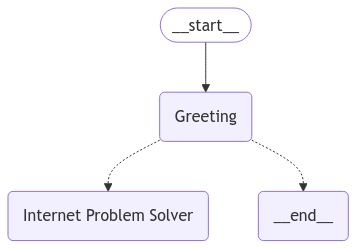

In [10]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from IPython.display import Image, display
from typing_extensions import Annotated, TypedDict

def internet_problem_solver(user_input: str):
    if "internet" not in user_input.lower():
        return "I can only assist with internet-related problems. Please ask about issues such as slow speeds, connection drops, or Wi-Fi setups."

    responses = []
    try:
        tool_response = tool.invoke(user_input)

        if tool_response:
            responses.append(f"{tool_response}")
    except Exception as e:
        print(f"Error invoking TavilySearchResults: {str(e)}")
        responses.append(f"Error with TavilySearchResults: {str(e)}")

    try:
        llm_response = llm.invoke(user_input)

        if llm_response:
            responses.append(f"{llm_response}")
    except Exception as e:
        print(f"Error invoking LLM: {str(e)}")
        responses.append(f"Error with LLM: {str(e)}")

    if responses:
        return "\n\n".join(responses)
    else:
        return "No meaningful response from tools or LLM."

def greeting_handler(user_input: str):
    greetings = ["hello", "hi", "hey", "greetings"]
    if any(greet in user_input.lower() for greet in greetings):
        return "Hello! How can I assist you today? If you have any internet-related issues, feel free to ask!"
    else:
        return "Redirecting to the Internet Problem Solver for your query."

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)
graph_builder.add_node("Greeting", greeting_handler)
graph_builder.add_node("Internet Problem Solver", internet_problem_solver)
graph_builder.add_edge(START, "Greeting")
graph_builder.add_conditional_edges(
    "Greeting",
    {
        "Internet Problem Solver": lambda user_input: "internet" in user_input.lower(),
        END: lambda user_input: not ("internet" in user_input.lower())
    }
)
graph = graph_builder.compile()

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [11]:
from pprint import pprint

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q", "bye"]:
            pprint("Goodbye!")
            break

        answer = internet_problem_solver(user_input)
        pprint(f"Assistant: {answer}")
    except Exception as e:
        pprint(f"Error: {e}")

User: hi
('Assistant: I can only assist with internet-related problems. Please ask '
 'about issues such as slow speeds, connection drops, or Wi-Fi setups.')
User: why internet is so slow


domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/generate_content_requests"
}
metadata {
  key: "quota_location"
  value: "us-west4"
}
metadata {
  key: "quota_limit"
  value: "GenerateContentRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "0"
}
metadata {
  key: "consumer"
  value: "projects/838055587445"
}
, links {
  description: "Request a higher quota limit."
  url: "https://cloud.google.com/docs/quotas/help/request_increase"
}
].


Error invoking LLM: 429 Quota exceeded for quota metric 'Generate Content API requests per minute' and limit 'GenerateContent request limit per minute for a region' of service 'generativelanguage.googleapis.com' for consumer 'project_number:838055587445'. [reason: "RATE_LIMIT_EXCEEDED"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/generate_content_requests"
}
metadata {
  key: "quota_location"
  value: "us-west4"
}
metadata {
  key: "quota_limit"
  value: "GenerateContentRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "0"
}
metadata {
  key: "consumer"
  value: "projects/838055587445"
}
, links {
  description: "Request a higher quota limit."
  url: "https://cloud.google.com/docs/quotas/help/request_increase"
}
]
("Assistant: [{'url': "
 "'https://broadbandnow.com/guides/why-is-my-internet-so-slow', 'content': 'If "
 '